# Graficando valores de $c/a$ vs Energía Total por cada volumen dado

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Definiendo directorio principal

In [32]:
directorio_principal = '/home/marcocarmonaga/Documents/MoB_2-Study-Properties_Quantum_expresso/notebooks-scripts'
os.chdir(directorio_principal)

# Cambiando a carpeta sobre la que se trabajará (directorio secundario)

In [33]:
scf_directory = '../data/processed/scf'
os.chdir(scf_directory)

# Enlistando archivos dentro de la carpeta secundaria

In [34]:
directories = os.listdir()
directories

['110', '0', '120', '90', '70', '80', '65', '130', '150', '140', '50', '100']

# Generando función para graficar

In [35]:
def dos_plot(directorio:str):
    os.chdir(directorio)
    # Leyendo archivos mob2_dos.dos y extrayendo valor de EFermi
    dos_file = np.loadtxt('mob2_dos.dos')
    dos_read = open('mob2_dos.dos','r')
    lines = dos_read.readlines()
    fermi = float(lines[0][45:-4])

    # Creando dataframe
    dos_df = pd.DataFrame(dos_file)
    dos_df.columns = ['eV','dos', 'int_dos']
    dos_df.eV = dos_df.eV.apply(lambda x: x-fermi)
    dos_df = dos_df.loc[((dos_df.eV >= -10) & (dos_df.eV<=10))]

    fig, ax = plt.subplots()
    fig.set_size_inches(10,3.3)
    plt.xlim(-10, 10)
    plt.ylim(dos_df['dos'].min(),dos_df['dos'].max())
    ax.plot(dos_df['eV'], dos_df['dos'], c='black')
    ax.plot([0,0],[dos_df['dos'].min(),dos_df['dos'].max()], '--', c='gray')
    ax.set_xlabel('Energy (eV)')
    ax.set_ylabel('Estados / eV')
    ax.set_title(f'{directorio} GPa')
    plt.savefig(f'/home/marcocarmonaga/Documents/MoB_2-Study-Properties_Quantum_expresso/images/dos/{directorio}_GPa.png')
    plt.show()
    os.chdir('../')

# Generando gráficas de densidad de estado para las diferentes presiones.

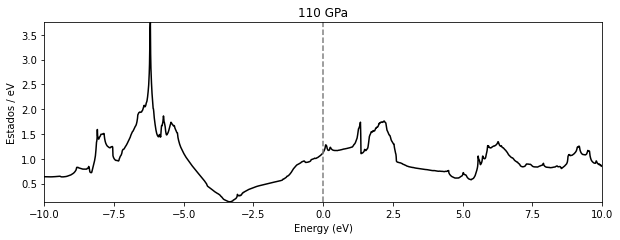

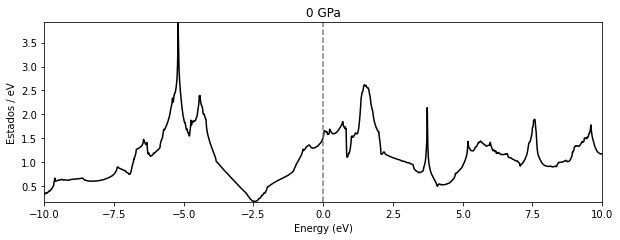

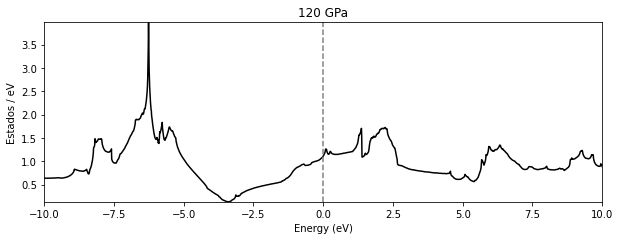

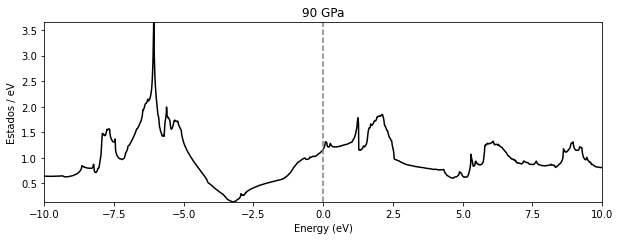

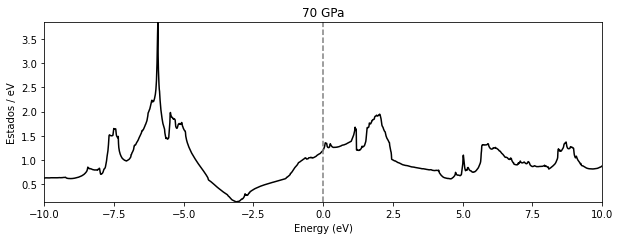

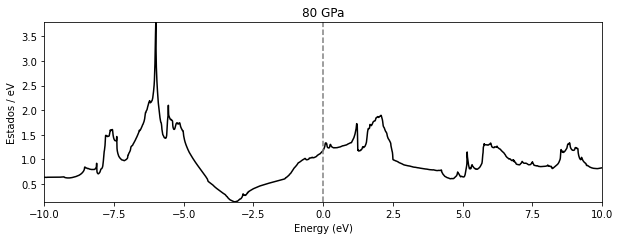

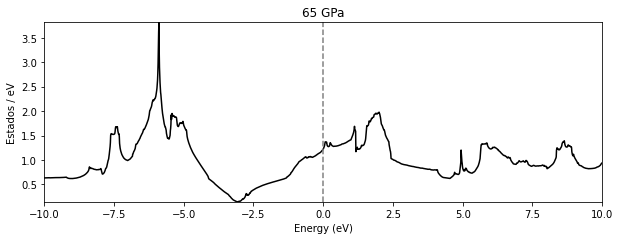

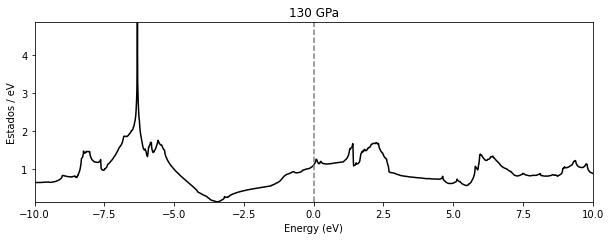

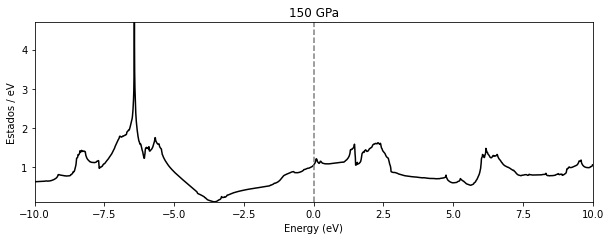

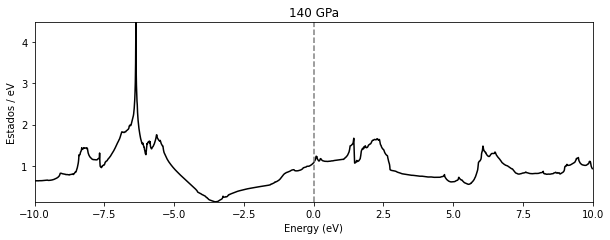

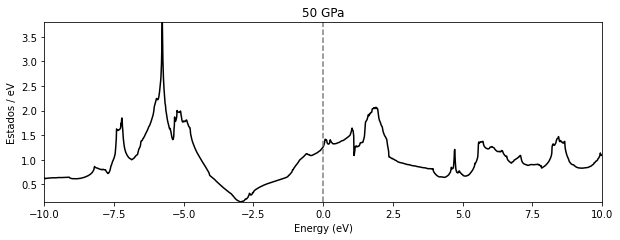

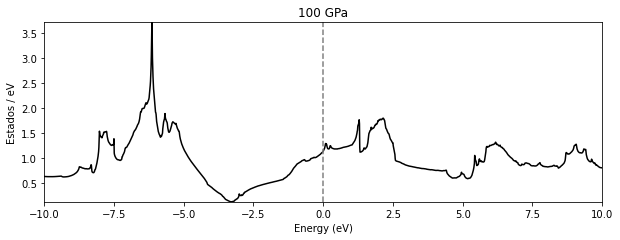

In [36]:
for directory in directories:
    dos_plot(directory)